In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "marche"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,11,Marche,0,0,0,0,0,0,0,...,0.0,5.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,11,Marche,1,0,1,0,1,1,1,...,0.0,7.0,0.0,0.0,0.00,100.00,14.29,0.00,0.00,0.00
2,2020-02-27T18:00:00,11,Marche,2,1,3,0,3,2,2,...,0.0,18.0,0.0,0.0,33.33,100.00,11.11,0.00,0.00,200.00
3,2020-02-28T18:00:00,11,Marche,3,2,5,1,6,3,3,...,0.0,1.0,0.0,1.0,40.00,83.33,300.00,0.00,100.00,100.00
4,2020-02-29T17:00:00,11,Marche,6,2,8,3,11,5,5,...,0.0,21.0,0.0,2.0,25.00,72.73,23.81,0.00,0.00,83.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,2020-12-10T17:00:00,11,Marche,501,86,587,12632,13219,-298,323,...,9.0,3071.0,1890.0,-282.0,14.65,4.44,10.52,17.09,1.18,-2.20
290,2020-12-11T17:00:00,11,Marche,490,86,576,12537,13113,-106,483,...,6.0,4697.0,2846.0,-95.0,14.93,4.39,10.28,16.97,0.00,-0.80
291,2020-12-12T17:00:00,11,Marche,487,86,573,12030,12603,-510,451,...,11.0,4139.0,2765.0,-507.0,15.01,4.55,10.90,16.31,0.00,-3.89
292,2020-12-13T17:00:00,11,Marche,476,81,557,11737,12294,-309,481,...,14.0,4206.0,2527.0,-293.0,14.54,4.53,11.44,19.03,-5.81,-2.45


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 14, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 174
Nuovi tamponi: 1075.0
Percentuale nuovi positivi/nuovi tamponi: 16.2 %
Nuovi guariti: -344.0
Nuovi deceduti: 10.0
Variazione positivi ricoverati con sintomi: -7.0
Variazione positivi in terapia intensiva: 2.0
Variazione positivi in isolamento dimiciliare: 513.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 14, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-10-15T17:00:00,11,Marche,61,9,70,1594,1664,127,140,...,0.0,2674.0,1451.0,129.0,12.86,4.21,5.24,9.65,12.50,8.26
1,2020-10-16T17:00:00,11,Marche,73,10,83,1671,1754,90,115,...,0.0,2198.0,1191.0,77.0,12.05,4.73,5.23,9.66,11.11,5.41
2,2020-10-17T17:00:00,11,Marche,77,10,87,1775,1862,108,121,...,0.0,2194.0,1221.0,104.0,11.49,4.67,5.52,9.91,0.00,6.16
3,2020-10-18T17:00:00,11,Marche,88,13,101,1944,2045,183,204,...,3.0,2542.0,1662.0,169.0,12.87,4.94,8.03,12.27,30.00,9.83
4,2020-10-19T17:00:00,11,Marche,97,16,113,2005,2118,73,98,...,0.0,1217.0,694.0,61.0,14.16,5.34,8.05,14.12,23.08,3.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-12-10T17:00:00,11,Marche,501,86,587,12632,13219,-298,323,...,9.0,3071.0,1890.0,-282.0,14.65,4.44,10.52,17.09,1.18,-2.20
57,2020-12-11T17:00:00,11,Marche,490,86,576,12537,13113,-106,483,...,6.0,4697.0,2846.0,-95.0,14.93,4.39,10.28,16.97,0.00,-0.80
58,2020-12-12T17:00:00,11,Marche,487,86,573,12030,12603,-510,451,...,11.0,4139.0,2765.0,-507.0,15.01,4.55,10.90,16.31,0.00,-3.89
59,2020-12-13T17:00:00,11,Marche,476,81,557,11737,12294,-309,481,...,14.0,4206.0,2527.0,-293.0,14.54,4.53,11.44,19.03,-5.81,-2.45


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

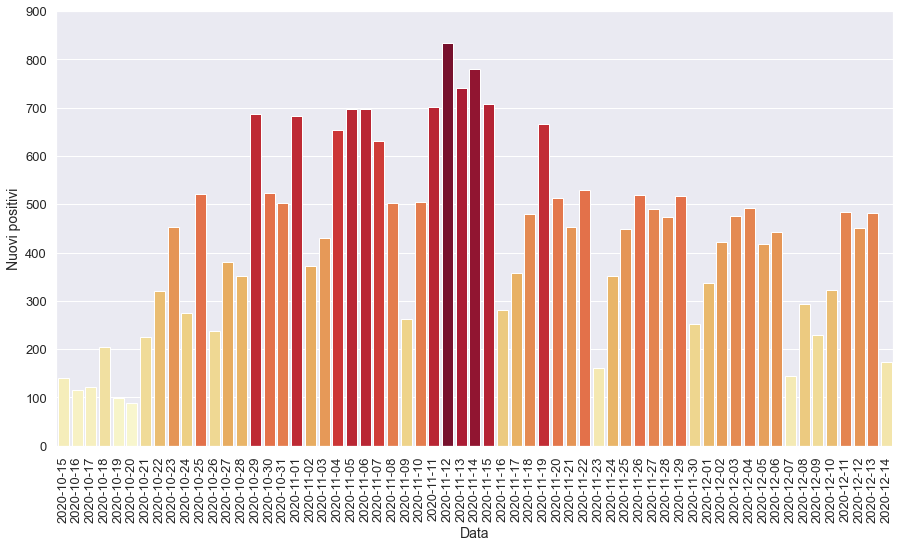

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

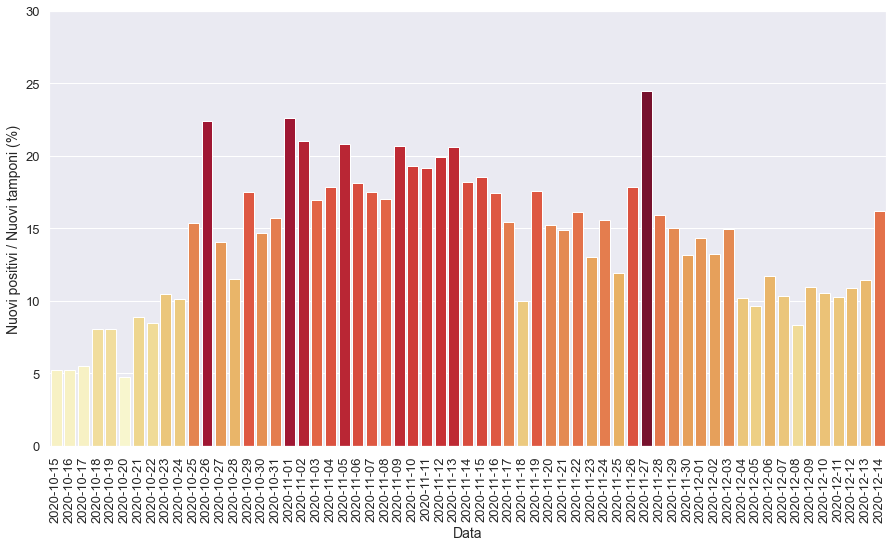

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

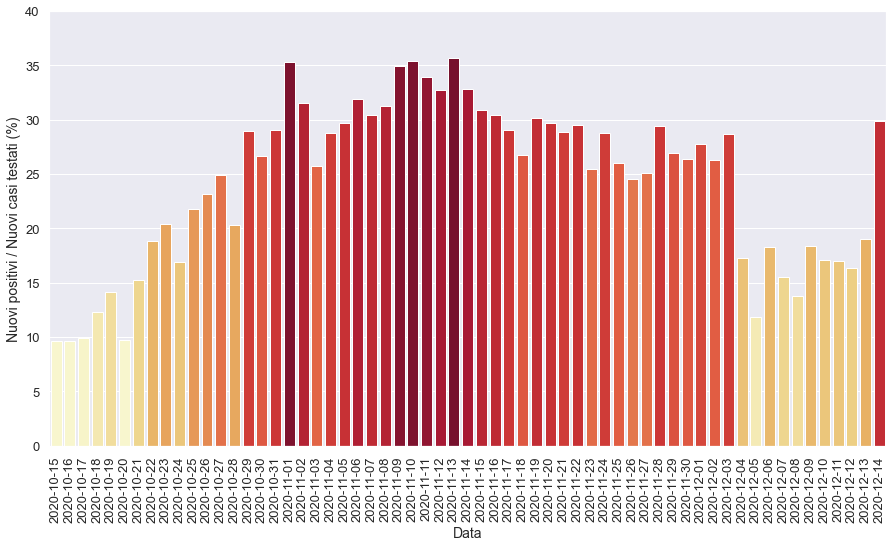

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

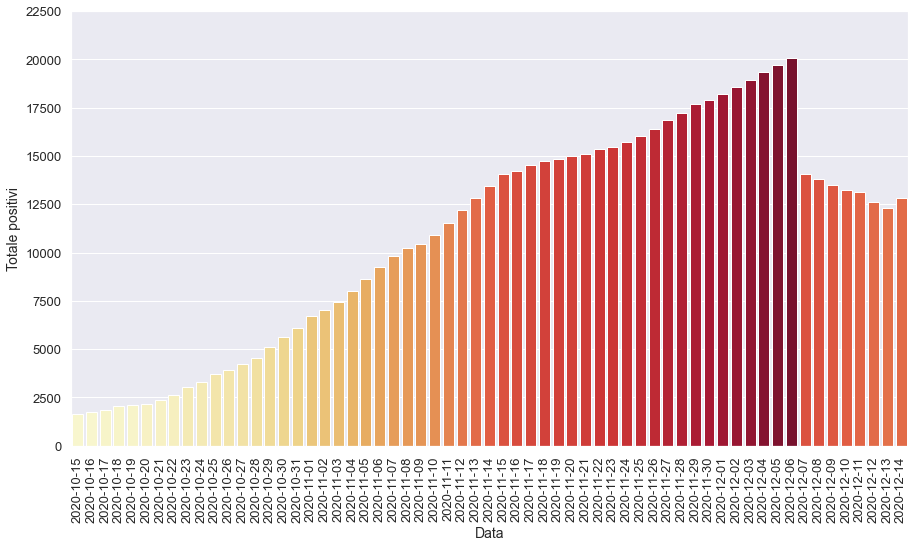

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

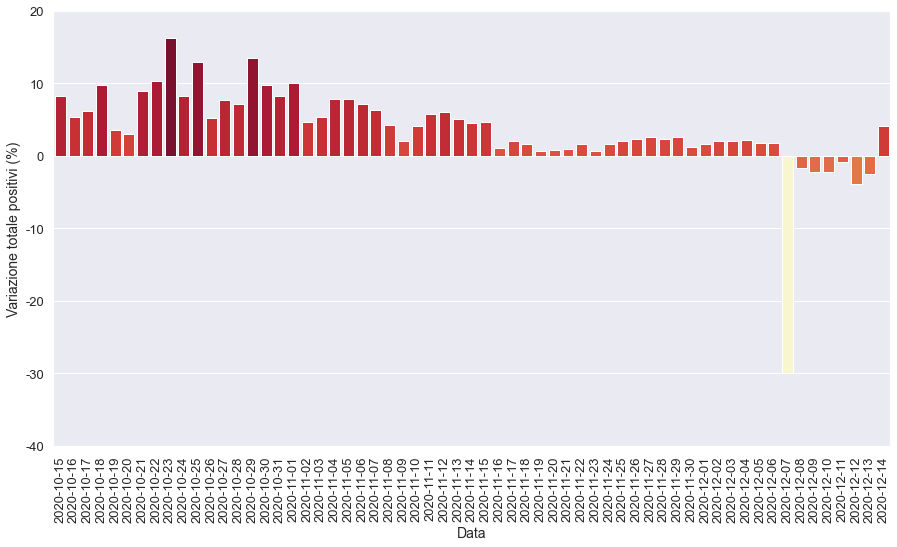

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

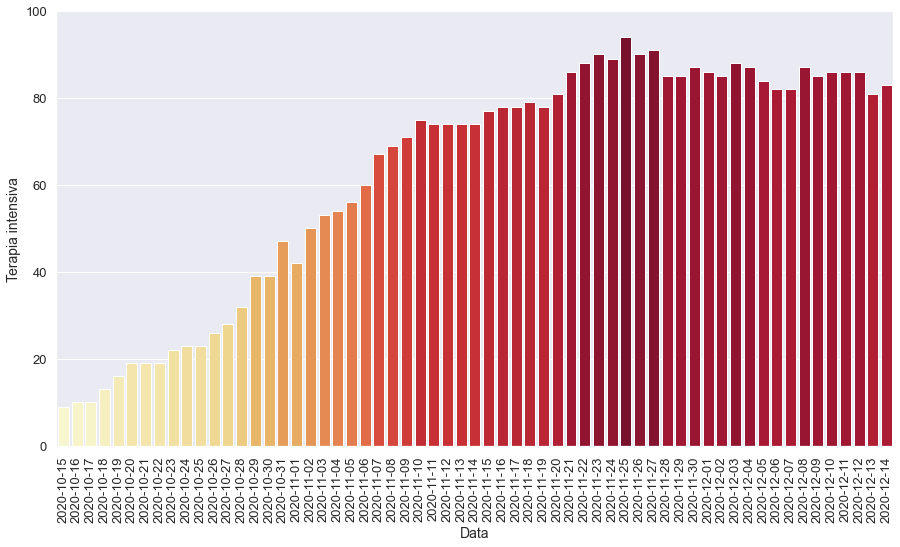

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

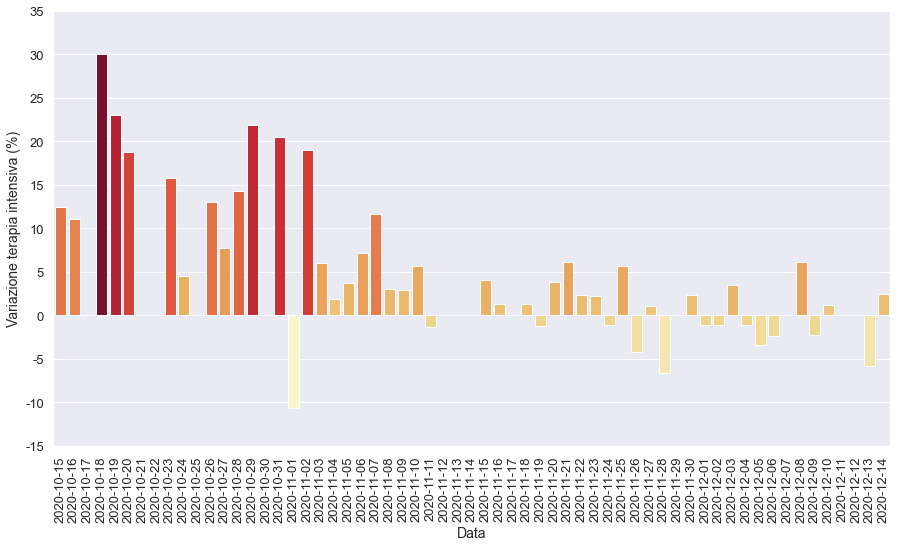

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

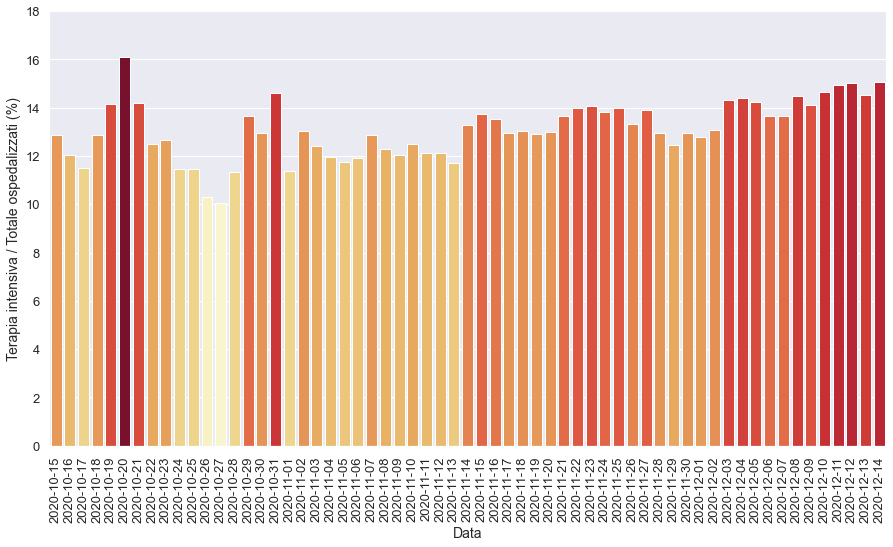

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

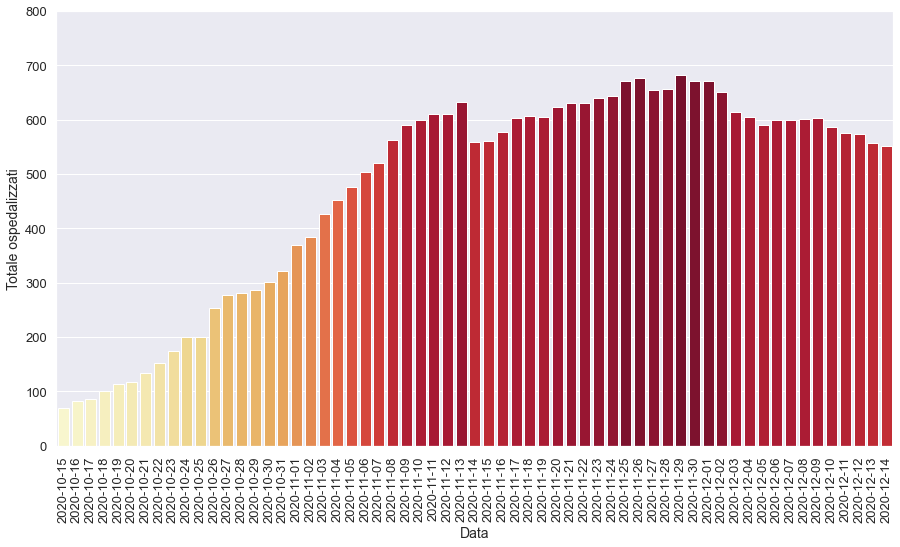

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

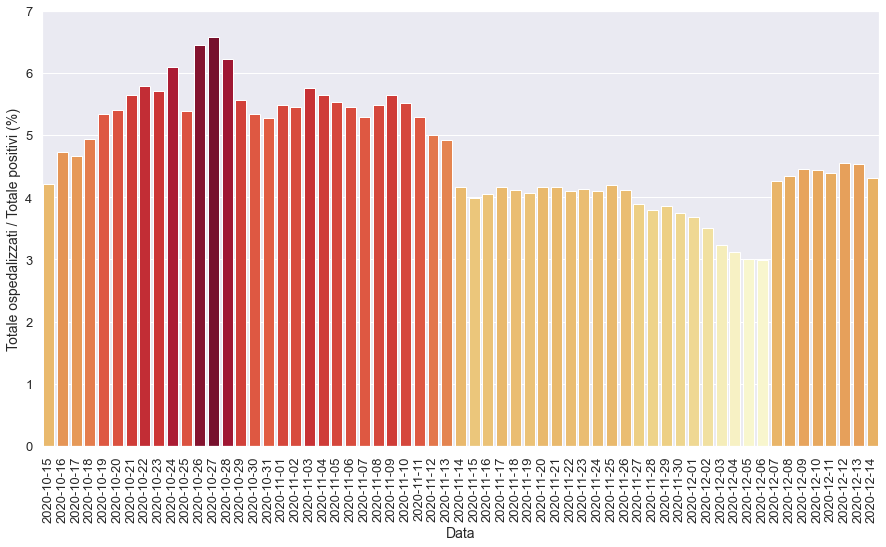

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

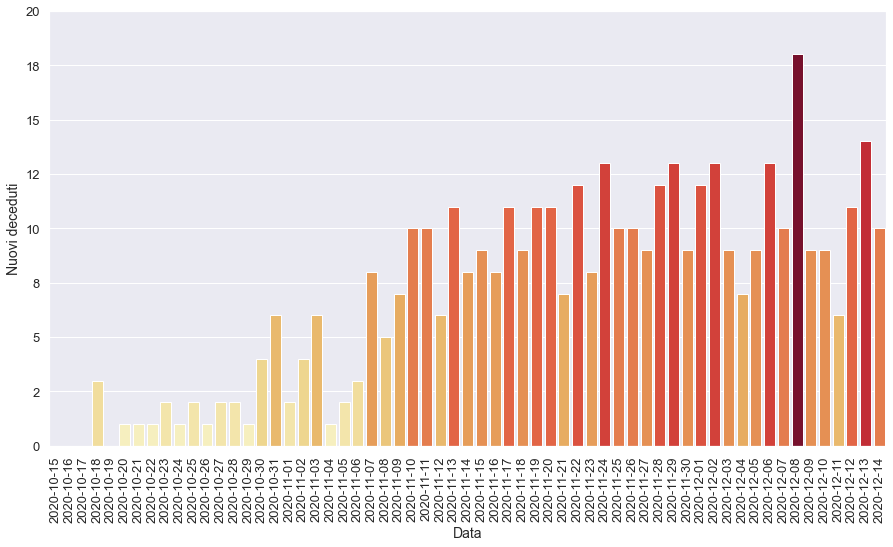

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

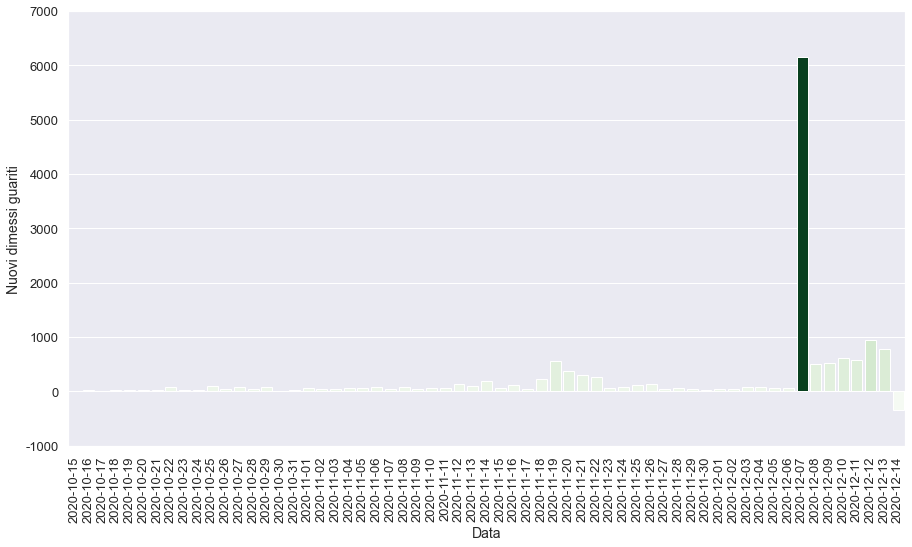

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-14T17:00:00,11,Marche,484,74,558,12861,13419,585,779,...,8.0,4275.0,2375.0,660.0,13.26,4.16,18.22,32.80,0.00,4.56
1,2020-11-15T17:00:00,11,Marche,483,77,560,13489,14049,630,707,...,9.0,3819.0,2289.0,628.0,13.75,3.99,18.51,30.89,4.05,4.69
2,2020-11-16T17:00:00,11,Marche,499,78,577,13634,14211,162,282,...,8.0,1620.0,928.0,145.0,13.52,4.06,17.41,30.39,1.30,1.15
3,2020-11-17T17:00:00,11,Marche,525,78,603,13908,14511,300,357,...,11.0,2308.0,1229.0,274.0,12.94,4.16,15.47,29.05,0.00,2.11
4,2020-11-18T17:00:00,11,Marche,527,79,606,14147,14753,242,479,...,9.0,4802.0,1789.0,239.0,13.04,4.11,9.98,26.77,1.28,1.67
5,2020-11-19T17:00:00,11,Marche,526,78,604,14252,14856,103,667,...,11.0,3795.0,2213.0,105.0,12.91,4.07,17.58,30.14,-1.27,0.70
6,2020-11-20T17:00:00,11,Marche,542,81,623,14354,14977,121,512,...,11.0,3367.0,1725.0,102.0,13.00,4.16,15.21,29.68,3.85,0.81
7,2020-11-21T17:00:00,11,Marche,544,86,630,14492,15122,145,452,...,7.0,3032.0,1567.0,138.0,13.65,4.17,14.91,28.84,6.17,0.97
8,2020-11-22T17:00:00,11,Marche,542,88,630,14737,15367,245,529,...,12.0,3282.0,1793.0,245.0,13.97,4.10,16.12,29.50,2.33,1.62
9,2020-11-23T17:00:00,11,Marche,550,90,640,14822,15462,95,161,...,8.0,1239.0,633.0,85.0,14.06,4.14,12.99,25.43,2.27,0.62


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

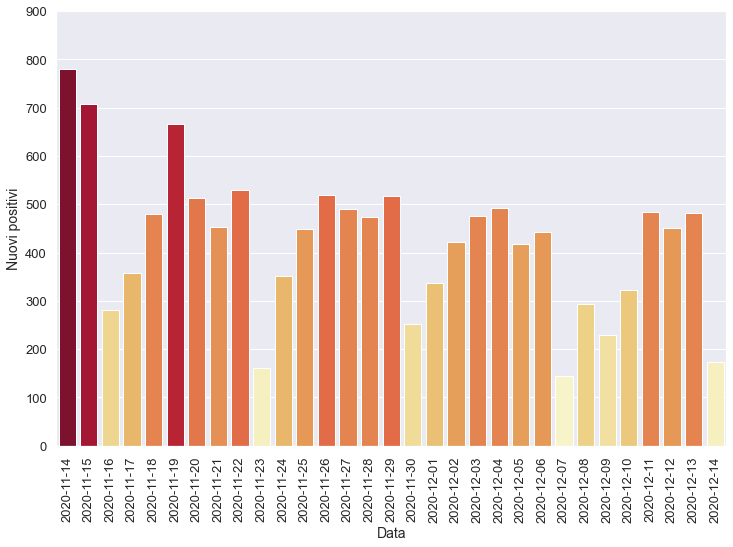

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

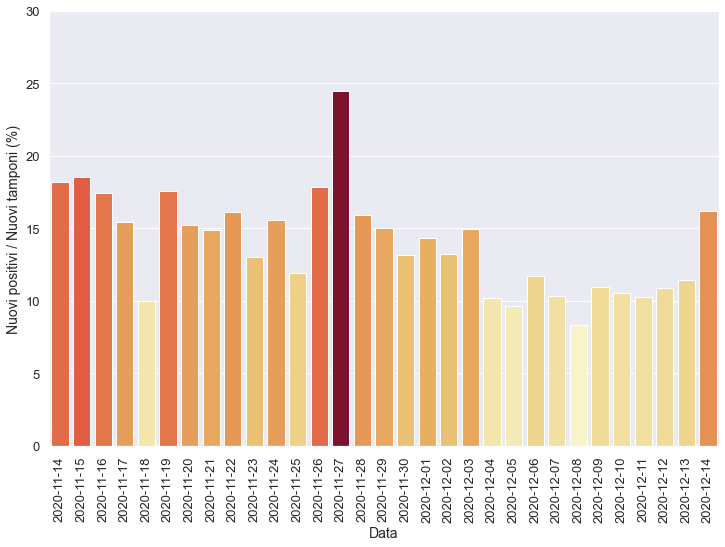

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

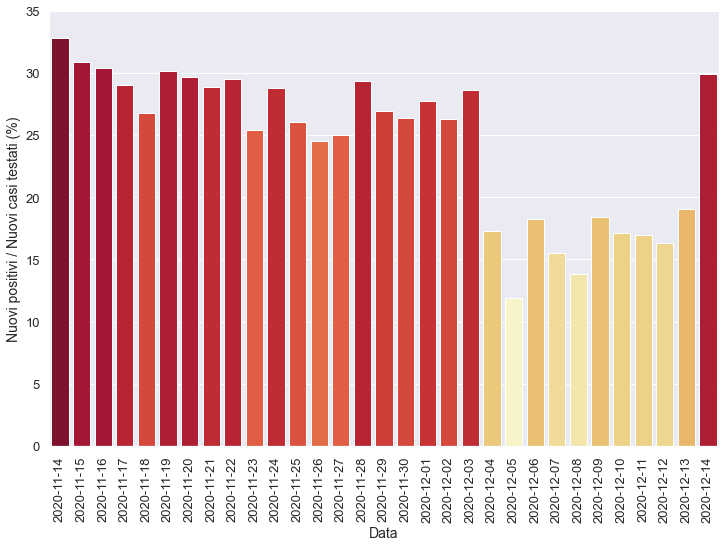

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

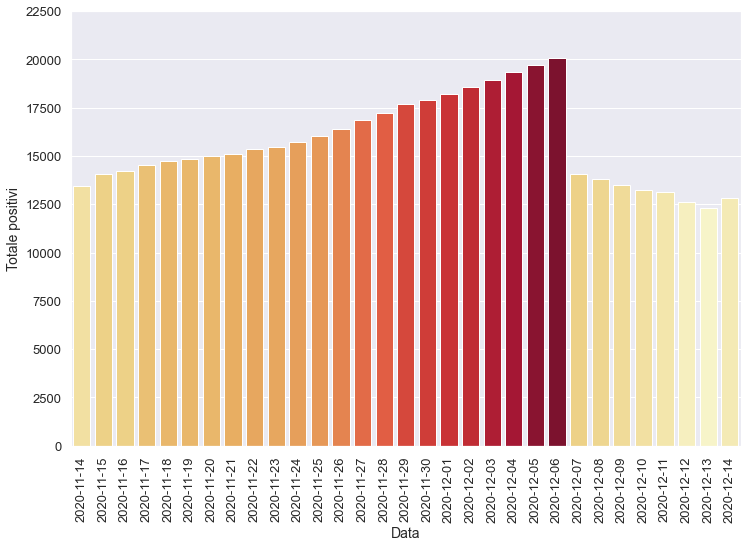

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

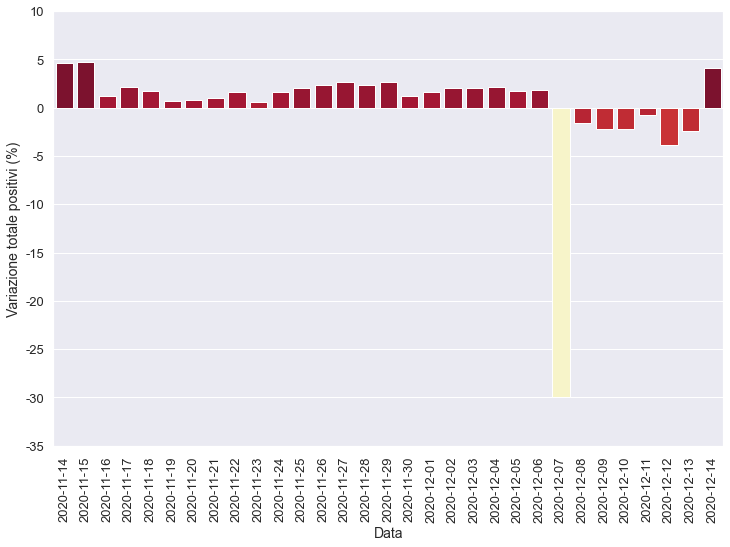

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

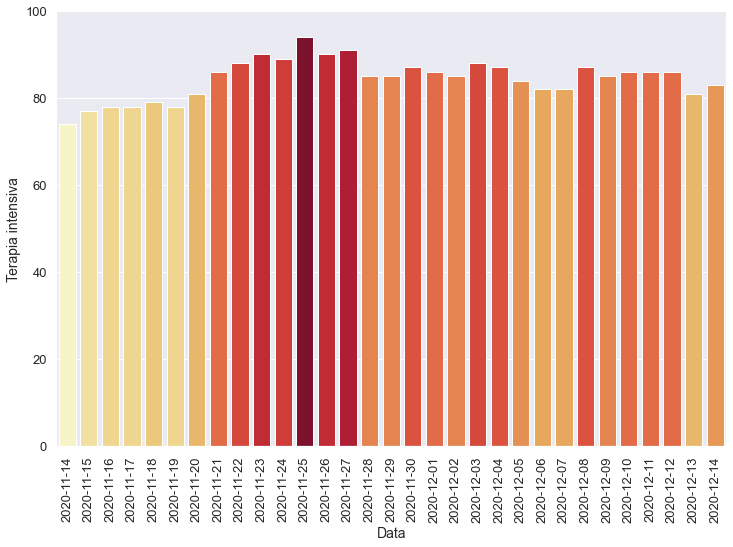

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

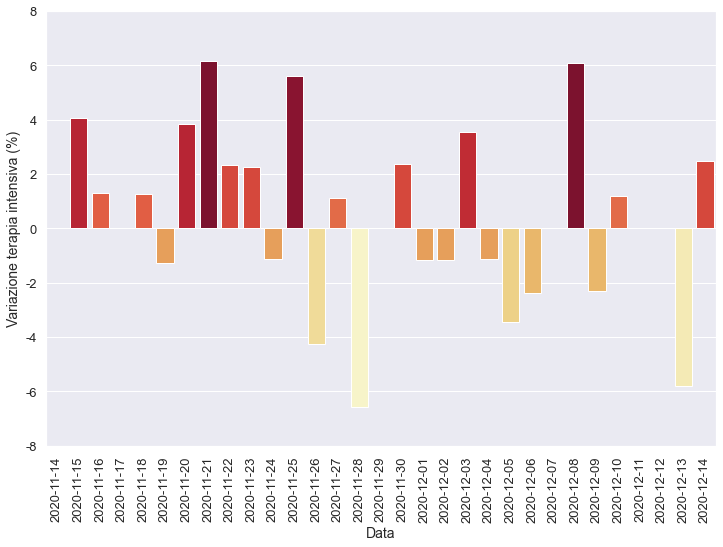

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

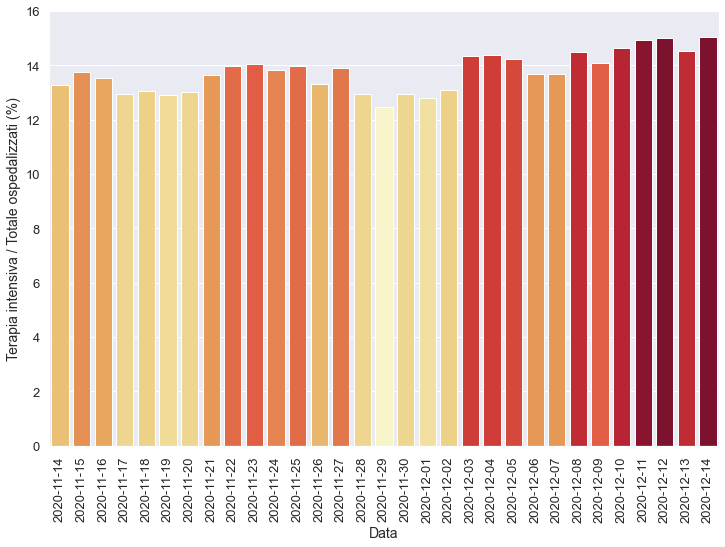

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

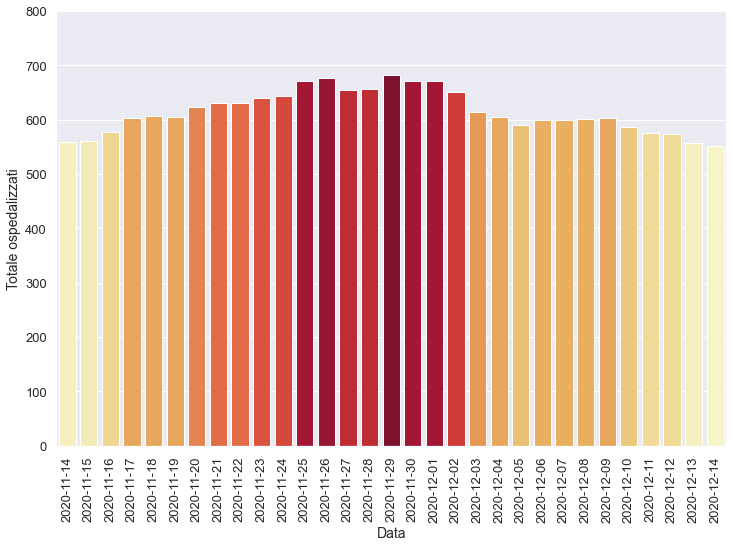

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

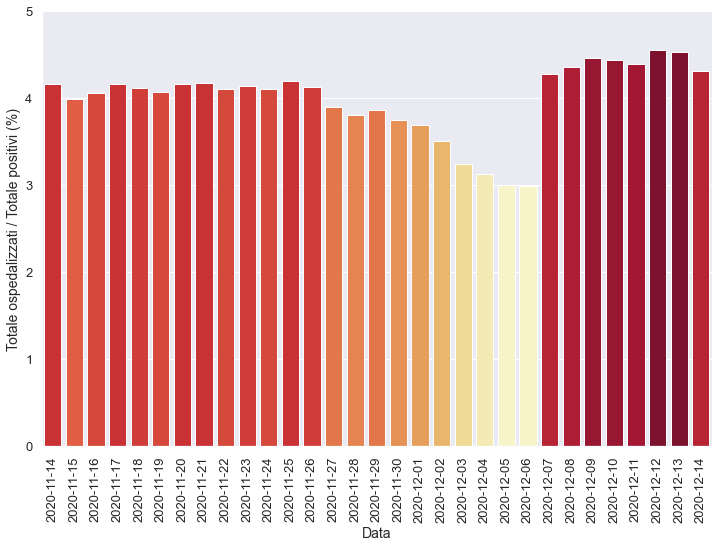

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

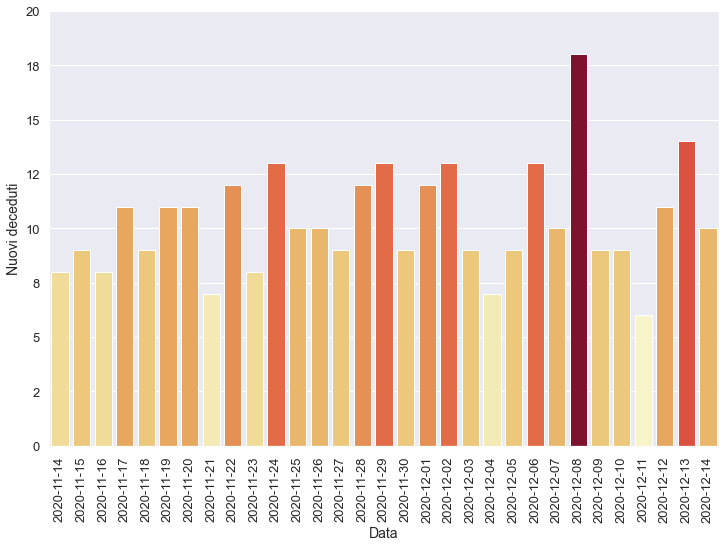

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

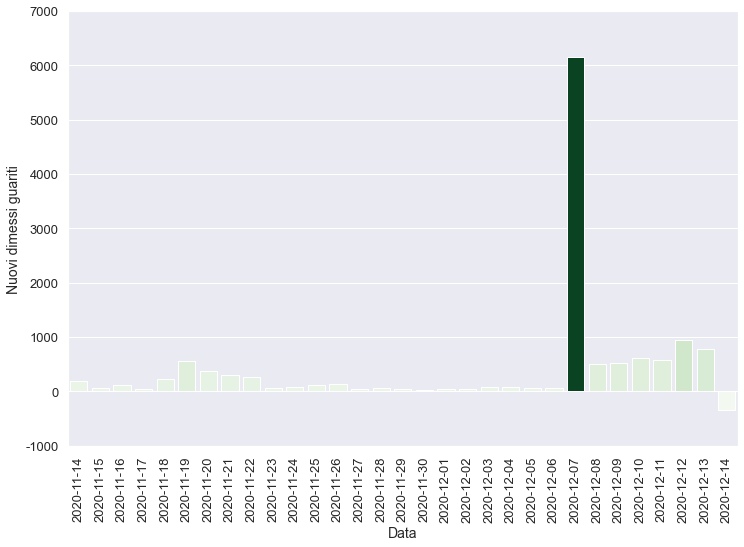

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-07T17:00:00,11,Marche,518,82,600,13448,14048,-6010,145,...,10.0,1400.0,935.0,-6010.0,13.67,4.27,10.36,15.51,0.00,-29.96
1,2020-12-08T17:00:00,11,Marche,514,87,601,13220,13821,-227,293,...,18.0,3510.0,2120.0,-228.0,14.48,4.35,8.35,13.82,6.10,-1.62
2,2020-12-09T17:00:00,11,Marche,518,85,603,12914,13517,-304,229,...,9.0,2087.0,1246.0,-306.0,14.10,4.46,10.97,18.38,-2.30,-2.20
3,2020-12-10T17:00:00,11,Marche,501,86,587,12632,13219,-298,323,...,9.0,3071.0,1890.0,-282.0,14.65,4.44,10.52,17.09,1.18,-2.20
4,2020-12-11T17:00:00,11,Marche,490,86,576,12537,13113,-106,483,...,6.0,4697.0,2846.0,-95.0,14.93,4.39,10.28,16.97,0.00,-0.80
5,2020-12-12T17:00:00,11,Marche,487,86,573,12030,12603,-510,451,...,11.0,4139.0,2765.0,-507.0,15.01,4.55,10.90,16.31,0.00,-3.89
6,2020-12-13T17:00:00,11,Marche,476,81,557,11737,12294,-309,481,...,14.0,4206.0,2527.0,-293.0,14.54,4.53,11.44,19.03,-5.81,-2.45
7,2020-12-14T17:00:00,11,Marche,469,83,552,12250,12802,508,174,...,10.0,1075.0,582.0,513.0,15.04,4.31,16.19,29.90,2.47,4.13


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

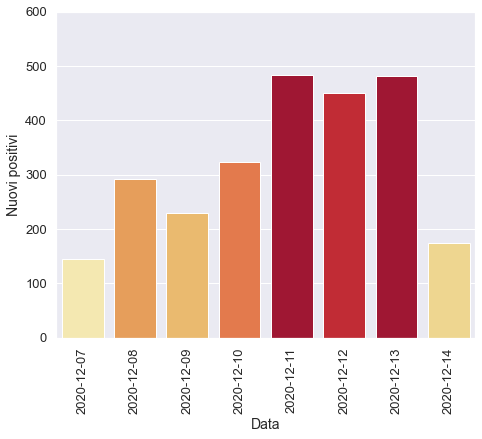

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

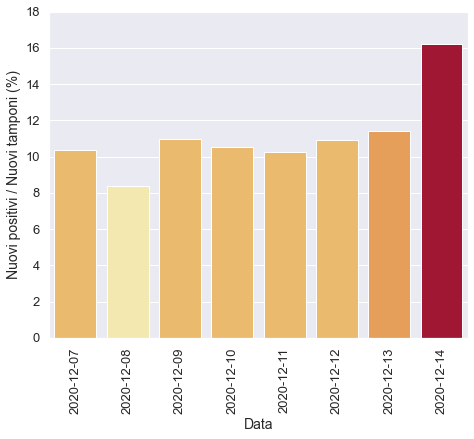

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

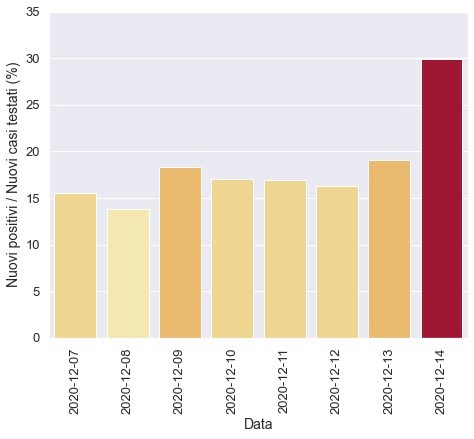

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

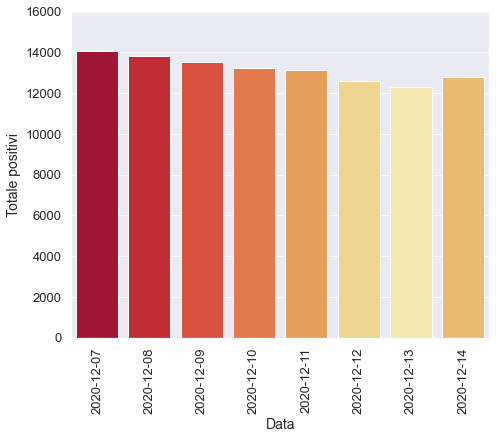

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

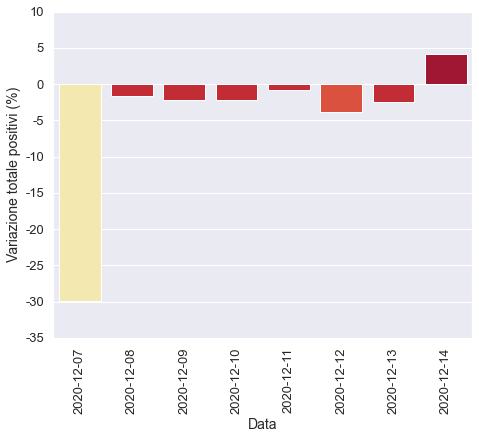

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

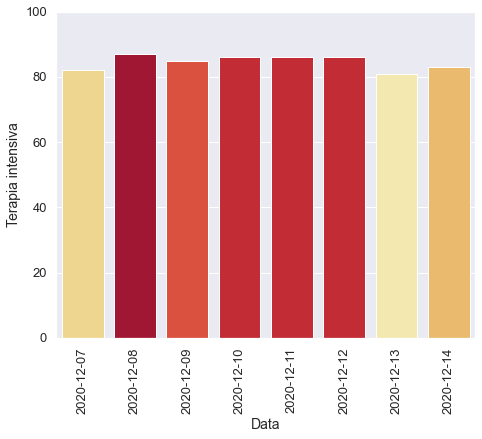

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

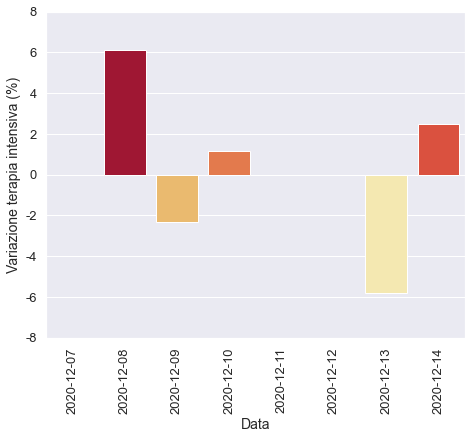

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

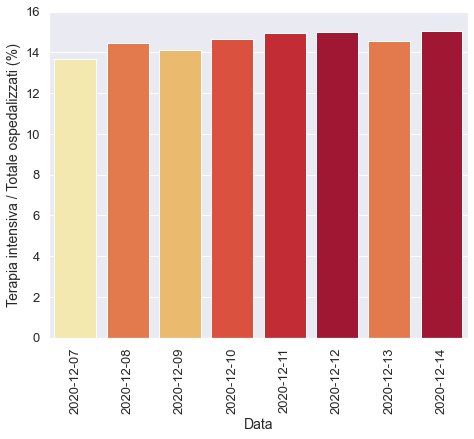

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

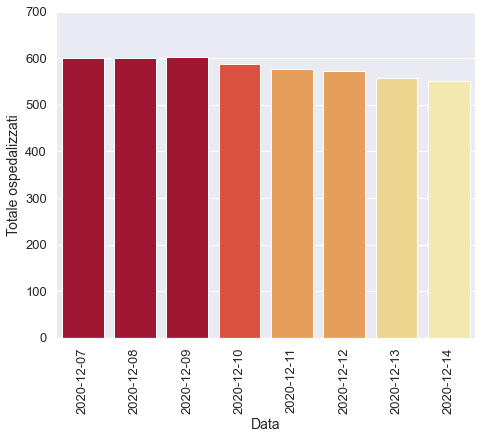

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

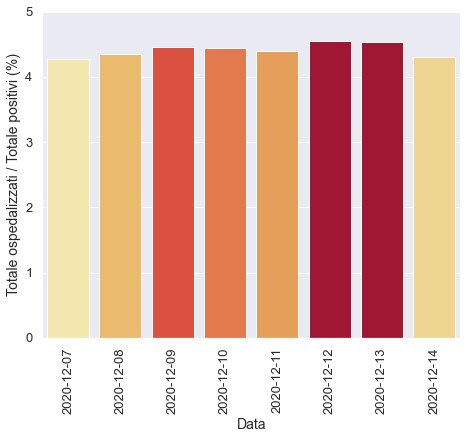

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

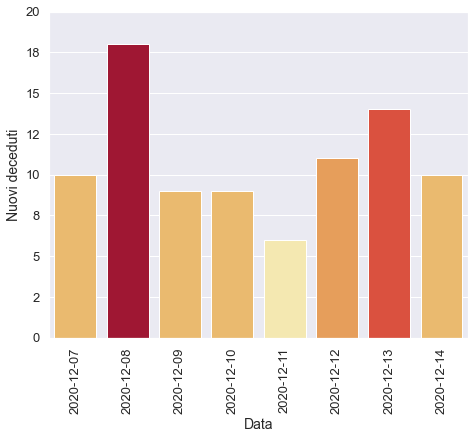

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

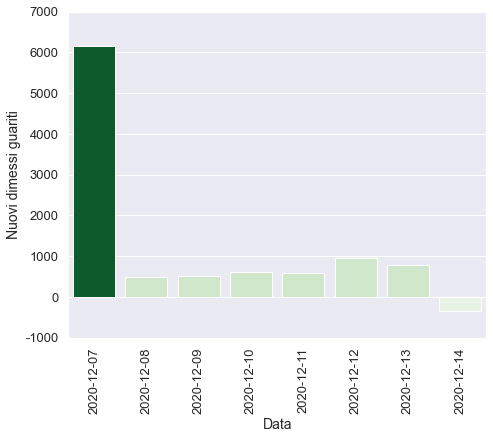

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)